<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Battery-Project/hypothesis-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **가설 검정**

In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [4]:
import pandas as pd
import numpy as np

import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib

### **데이터 구성하기**

In [6]:
df_raw_process = pd.read_csv('/content/mydrive/MyDrive/posco-big-data/bat_process.csv', encoding = 'euc-kr')


print(df_raw_process.shape)
df_raw_process.head()

(43754, 109)


,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36


In [7]:
df_raw_tat = pd.read_csv('/content/mydrive/MyDrive/posco-big-data/bat_tat.csv', encoding = 'euc-kr')


print(df_raw_tat.shape)
df_raw_tat.head()

(43754, 25)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,lot_id,tray_id,dt_start,cell_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,...,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,217066,86461,5732,118,3556,405,...,118,290,290,53500,5,355357,5,215150,5,207532
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,217066,86461,5732,118,3556,405,...,118,290,290,53501,5,355357,5,215150,5,207532
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,217066,86461,5732,119,3556,404,...,118,290,290,53500,5,355357,5,215150,5,207532


In [ ]:
# df_raw.loc[df_raw['judge'] == '불량', 'judge'] = 1
# df_raw.loc[df_raw['judge'] == '양품', 'judge'] = 0

In [8]:
df_raw = pd.merge(df_raw_process, df_raw_tat)

print(df_raw.shape)
df_raw.head()

(43754, 130)


,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,118,290,290,53501,5,355357,5,215150,5,207532
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532


In [9]:
df_raw.replace('.', np.NaN, inplace=True)
df_raw.replace(' ', np.NaN, inplace=True)

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,118,290,290,53501,5,355357,5,215150,5,207532
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43749,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53649,양품,16,08열,21연,03단,02열,...,118,290,291,43419,4,345062,5,215255,5,156836
43750,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53650,양품,14,08열,21연,03단,02열,...,118,290,291,43419,4,345062,5,215255,5,156836
43751,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53651,양품,2,08열,21연,03단,02열,...,118,290,291,43419,4,345062,5,215255,5,156836
43752,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-54355,양품,15,08열,21연,03단,02열,...,118,290,291,43419,4,345062,5,215255,5,156836


In [10]:
df_raw.dropna(inplace = True)

In [11]:
df_raw_new = df_raw.drop(['lot_id', 'tray_id', 'dt_start', 'cell_id'], axis = 1)

In [12]:
print(df_raw_new.shape)
df_raw_new.head()

(43727, 126)


,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,hta1_box_row,hta1_box_dan,rta2_box_col,rta2_box_row,...,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
0,양품,10,08열,33연,08단,03열,25연,03단,04열,64연,...,118,290,290,53500,5,355357,5,215150,5,207532
1,양품,7,08열,33연,08단,03열,25연,03단,04열,64연,...,118,290,290,53500,5,355357,5,215150,5,207532
2,양품,19,08열,33연,08단,03열,25연,03단,04열,64연,...,118,290,290,53500,5,355357,5,215150,5,207532
3,양품,24,08열,33연,08단,03열,25연,03단,04열,64연,...,118,290,290,53501,5,355357,5,215150,5,207532
4,양품,17,08열,33연,08단,03열,25연,03단,04열,64연,...,118,290,290,53500,5,355357,5,215150,5,207532


### **카이제곱검정**


In [ ]:
import pandas as pd
import scipy.stats as stats

ct = pd.crosstab(df_raw['c1_box_col'], df_raw['judge'])
ct

judge,불량,양품
c1_box_col,,
01열,55,1829
02열,71,2028
03열,67,1638
04열,20,1179
05열,40,1528
06열,14,1804
07열,69,2036
08열,53,1970
09열,19,1848


In [ ]:
stat, pval, df, expected = stats.chi2_contingency(observed = ct)

print('***** 카이제곱검정 *****')
print('H0 : 설비와 양품불량개수 간에는 관련성이 없다.')
print('H1 : 설비와 양품불량개수 간에는 관련성이 있다.')
print('')
print('통계량 : ', stat.round(3))
print('pvalue : ', pval.round(3))

***** 카이제곱검정 *****
H0 : 설비와 양품불량개수 간에는 관련성이 없다.
H1 : 설비와 양품불량개수 간에는 관련성이 있다.

통계량 :  747.636
pvalue :  0.0


- 검정통계량 747.636에 대한 유의확률 = 0.0 < 0.05이므로 귀무가설을 기각한다.
- 즉, 설비와 양품불량개수 간에는 관련성이 있다.

### **2 sample t-test**



In [76]:
# 정규성 검정

statistic1, p1 = stats.shapiro(df_raw.loc[df_raw['judge'] == '불량', 'c4_temp_avg'])
print("----------- 불량에 대한 정규성 검정 -----------")
print('H0 : 정규성을 만족한다.')
print('H1 : 정규성을 만족하지 않는다.')
print('')
print('통계량 : ', statistic1)
print('pvalue : ', p1)
print('')

statistic2, p2 = stats.shapiro(df_raw.loc[df_raw['judge'] == '양품', 'c4_temp_avg'])
print("----------- 양품에 대한 정규성 검정 -----------")
print('H0 : 정규성을 만족한다.')
print('H1 : 정규성을 만족하지 않는다.')
print('')
print('통계량 : ', statistic2)
print('pvalue : ', p2)
print('')

----------- 불량에 대한 정규성 검정 -----------
H0 : 정규성을 만족한다.
H1 : 정규성을 만족하지 않는다.

통계량 :  0.9536409974098206
pvalue :  2.8680519955147153e-20

----------- 양품에 대한 정규성 검정 -----------
H0 : 정규성을 만족한다.
H1 : 정규성을 만족하지 않는다.

통계량 :  0.9976987242698669
pvalue :  6.132877623061352e-24



- 불량과 양품 개수에 따른 온도의 유의확률 2.868, 6.133 > 0.05이므로 귀무가설을 채택한다.
- 두 집단 모두 정규성을 만족한다.

In [100]:
# 등분산성 검정

from scipy.stats import bartlett

statistic, p = stats.bartlett(df_raw.loc[df_raw['judge'] == '불량', 'c4_temp_avg'], 
                              df_raw.loc[df_raw['judge'] == '양품', 'c4_temp_avg'])
print("----------- 불량과 양품에 대한 등분산성 검정 -----------")
print('H0 : 등분산성을 만족한다.')
print('H1 : 등분산성을 만족하지 않는다.')
print('')
print('통계량 : ', statistic1)
print('pvalue : ', p)
print('')

----------- 불량과 양품에 대한 등분산성 검정 -----------
H0 : 등분산성을 만족한다.
H1 : 등분산성을 만족하지 않는다.

통계량 :  0.9536409974098206
pvalue :  3.648453010322984e-143



- 등분산성에 대한 검정통계량의 유의확률 3.648 > 0.05이므로 귀무가설을 채택한다.
- 등분산성이 만족된다.

In [ ]:
# 대응표본 t-검정

statistic, p = stats.ttest_ind(df_raw.loc[df_raw['judge'] == '불량', 'c4_temp_avg'], 
                              df_raw.loc[df_raw['judge'] == '양품', 'c4_temp_avg'])
print("----------- 2-Sample t-test -----------")
print('H0 : 양품과 불량 사이에 온도 차이가 없다.')
print('H1 : 양품과 불량 사이에 온도 차이가 있다.')
print('')
print('통계량 : ', statistic)
print('pvalue : ', p)
print('')

----------- 2-Sample t-test -----------
H0 : 양품과 불량 사이에 온도 차이가 없다.
H1 : 양품과 불량 사이에 온도 차이가 있다.

통계량 :  -20.380841079599833
pvalue :  6.624195875519124e-92



- 양품불량개수에 대한 유의확률 0.000 < 0.05이므로 귀무가설을 기각한다.
- 양품과 불량 사이에 온도 차이가 존재한다.

### **ANOVA 검정**


In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# ANOVA 실행
print('***** ANOVA분석 *****')
print('H0 : 설비에 따라 온도에 차이가 없다.')
print('H1 : 설비에 따라 온도에 차이가 있다.')
print('')
model = ols('c4_temp_avg ~ C(c1_box_col)', df_raw).fit()
anova_lm(model)

***** ANOVA분석 *****
H0 : 설비에 따라 온도에 차이가 없다.
H1 : 설비에 따라 온도에 차이가 있다.



,df,sum_sq,mean_sq,F,PR(>F)
C(c1_box_col),21.0,3.451246e+06,164345.031273,1117.68967,0.0
Residual,43705.0,6.426381e+06,147.039948,NaN,NaN


- 검정통계량에 대한 유의확률 0.0 < 0.05이므로 귀무가설을 기각한다.
- 설비에 따라 온도에 차이가 있다.

In [96]:
df_raw22 = df_raw[df_raw['c1_box_col'] == '22열']
df_raw21 = df_raw[df_raw['c1_box_col'] == '21열']

df_raw_top = pd.concat([df_raw22, df_raw21], axis = 0)

print(df_raw_top.shape)
df_raw_top.head()

(4996, 130)


,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,118,290,290,53501,5,355357,5,215150,5,207532
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,118,290,290,53500,5,355357,5,215150,5,207532


In [97]:
df_raw9 = df_raw[df_raw['c1_box_col'] == '9열']
df_raw18 = df_raw[df_raw['c1_box_col'] == '18열']
df_raw6 = df_raw[df_raw['c1_box_col'] == '6열']

df_raw_bot = pd.concat([df_raw9, df_raw18], axis = 0)
df_raw_bot = pd.concat([df_raw_bot, df_raw6], axis = 0)

print(df_raw_bot.shape)
df_raw_bot.head()

(1932, 130)


,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,ocv2_tat,pg1_tat,pc1_tat,sa1_tat,socv1_tat,sa2_tat,socv2_tat,sa3_tat,socv3_tat,sa4_tat
646,LOT-100,TRAY-1018,12-01-2021 오전 9:04:00,CELL-10575,양품,11,05열,29연,11단,02열,...,118,290,290,54346,5,355135,5,215549,6,208750
647,LOT-100,TRAY-1018,12-01-2021 오전 9:04:00,CELL-10576,양품,15,05열,29연,11단,02열,...,118,290,290,54346,5,355135,5,215549,5,208750
648,LOT-100,TRAY-1018,12-01-2021 오전 9:04:00,CELL-10577,양품,8,05열,29연,11단,02열,...,118,290,290,54346,5,355135,5,215549,6,208750
649,LOT-100,TRAY-1018,12-01-2021 오전 9:04:00,CELL-10578,양품,7,05열,29연,11단,02열,...,118,290,290,54346,5,355135,5,215549,6,208750
650,LOT-100,TRAY-1018,12-01-2021 오전 9:04:00,CELL-10579,양품,9,05열,29연,11단,02열,...,118,290,290,54346,5,355135,5,215549,6,208750


In [98]:
df_char = df_raw.select_dtypes(include = "object")
df_numeric = df_raw.select_dtypes(exclude = "object")

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_te

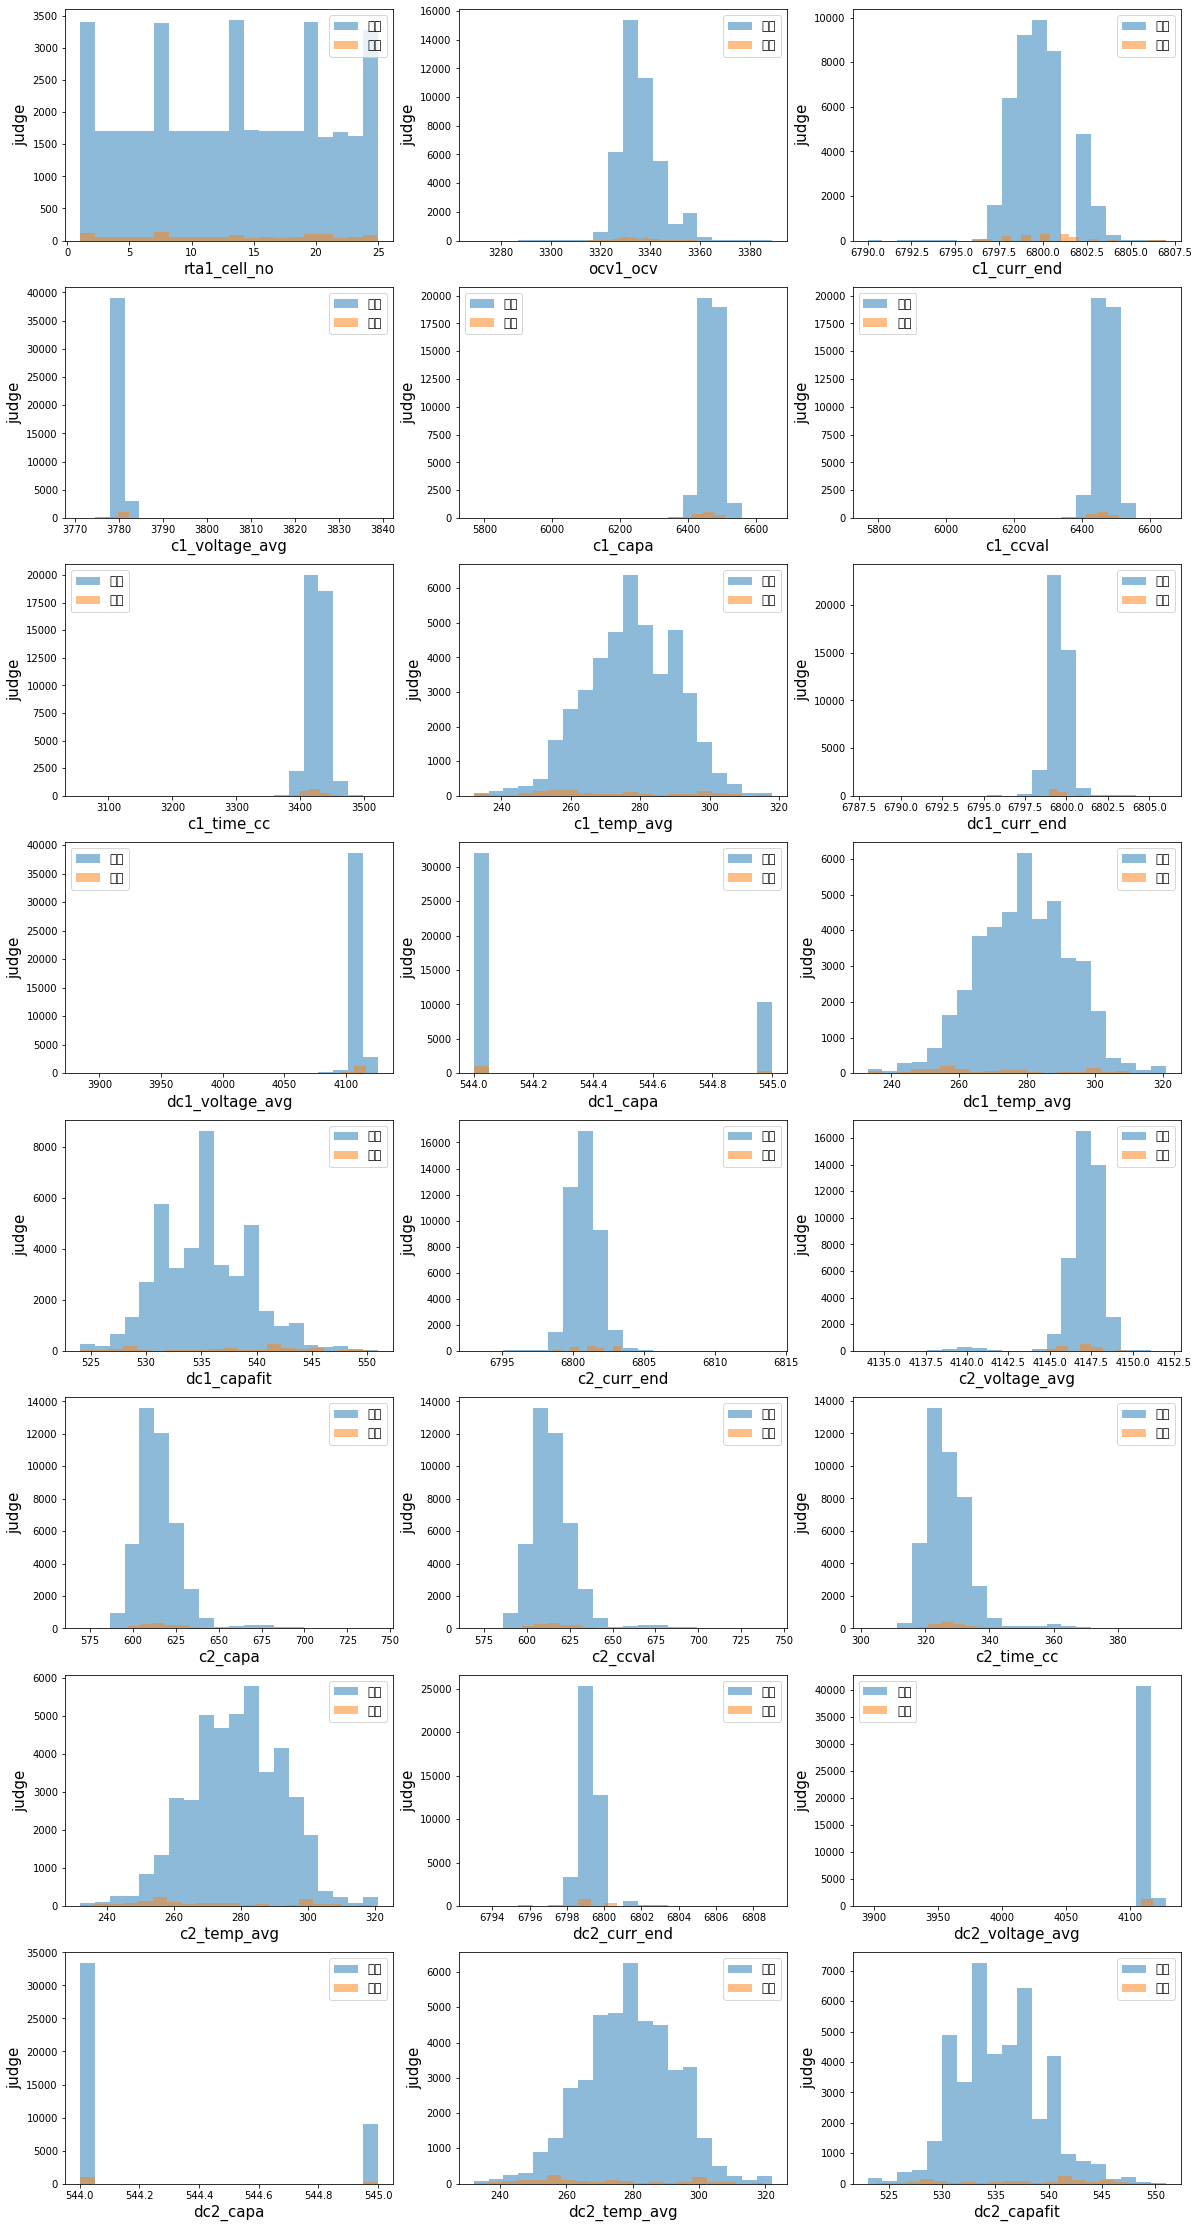

In [99]:
# 연속형 변수
# 그래프 분석 = 히스토그램

i = 0
plt.figure(figsize = (20, 40))
for col in df_numeric.columns :
  i += 1
  plt.subplot(8, 3, i)
  plt.hist(df_raw[df_raw["judge"] == "양품"][col], bins = 20, label = "양품", alpha = 0.5)
  plt.hist(df_raw[df_raw["judge"] == "불량"][col], bins = 20, label = "불량", alpha = 0.5)
  plt.xlabel(col, fontsize = 15)
  plt.ylabel("judge", fontsize = 15)
  plt.legend(fontsize = 12)
plt.show()

In [66]:
df_bad_top2 = [df_bad['c1_box_col'].value_counts().sort_values(ascending = False)[0],
               df_bad['c1_box_col'].value_counts().sort_values(ascending = False)[1]]

In [68]:
df_bad_bot3 = [df_bad['c1_box_col'].value_counts().sort_values(ascending = False)[19],
               df_bad['c1_box_col'].value_counts().sort_values(ascending = False)[21]]

In [69]:
df_bad_rank = pd.DataFrame()
df_bad_rank['top2'] = df_bad_top2
df_bad_rank['mid2'] = df_bad_mid2
df_bad_rank['bot2'] = df_bad_bot2

print(df_bad_rank)
df_bad_rank

   top2  mid2  bot2
0   291    64    20
1   136    64    14


,top2,mid2,bot2
0,291,64,20
1,136,64,14


In [73]:
corr, pval = stats.pearsonr(df_bad_rank['top2'], df_bad_rank['bot2'])

print("------- Correlation Analysis -------")
print("corr : {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

------- Correlation Analysis -------
corr : 1.000
p-value : 1.000
